In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_bloch_multivector, array_to_latex 
#array_to_latex will be used to print the state in a latex format
from qiskit.extensions import Initialize 
# initialize is used for initializing complex amplitudes ie vectoes which has complex numbers as element 
from qiskit.quantum_info import random_statevector #which will give us the randome quantum state.
#and we will use the initialze command

    

In [6]:
psi = random_statevector(2) # two elements because one qubit is a vector with two elements 
print('psi state: {}'.format(psi))
array_to_latex(psi)

psi state: Statevector([-0.76260798+0.32959145j,  0.09207252-0.54892731j],
            dims=(2,))


<IPython.core.display.Latex object>

C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


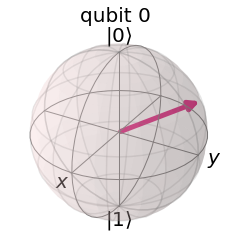

In [7]:
#to visualize 
plot_bloch_multivector(psi)



#the plot below will be the q0 as we saw in the theory lecture
#and it has to be teleported to q2
#q2 should become equal to q0 at the end of the teleportaton circit


In [8]:
init_state = Initialize(psi)
init_state.label = 'initial_state'



In [ ]:
# step by step we will create 4 functions which will correspond to the theory lectures we studied 



#the first step is to create  a bell pair





In [9]:
def create_bell_pair(qc,a,b):
    
#for the bell pair we apply a hadamard to the qubit that belongs to allice 
    qc.h(a) #an entanglement between alice and bob
    qc.cx(a,b) 


In [10]:
#in step 2 alice applies the cnot gate which is controlled with the q0 state, the psi state
#and target as the q1, which is another qubit that is shared with bob

def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)


In [16]:
#for step 3 alice measures her qubit and sends to bob
def measure_and_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [21]:
#the final function is bob applying his gates 
def bob_gates(qc,qubit,crz,crx):  #these are two classical registers 
    ##on this basis of  00,01, 10, 11 bib will apply the gates  so we use the c_if operations 
    qc.x(qubit).c_if(crx,1) #apply x gate on bob's qubit crx has a value 1
    qc.z(qubit).c_if(crz,1) #apply z operation on bob's qubit based on the classical bit recieved by alice
    

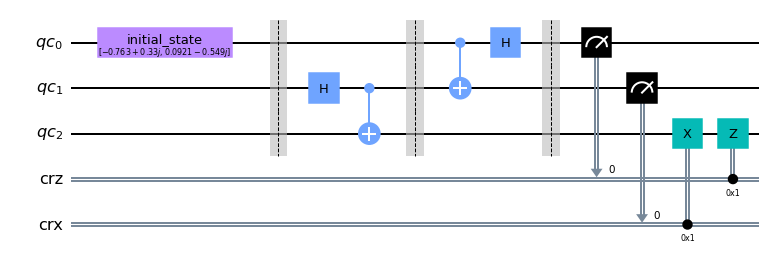

In [22]:
#to construct the teleportaton circuit

qr = QuantumRegister(3, name='qc')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
qc = QuantumCircuit(qr,crz, crx)



#lets append our initial state
qc.append(init_state, [0]) #applied to the first qubit
qc.barrier()

create_bell_pair(qc,1,2)
qc.barrier()

#on the second step alice applies her operations so lets call the function
alice_gates(qc,0, 1)


#on the third step alice measures and send the classical bit to bob
measure_and_send(qc, 0, 1)

#bob will measure his qubits
bob_gates(qc, 2, crz, crx)


#finally we draw
qc.draw('mpl')


 Quantum state is: [-0.763+0.33j  -0.   +0.j     0.   +0.j    -0.   +0.j     0.092-0.549j
 -0.   +0.j    -0.   +0.j    -0.   +0.j   ]


C:\Users\madua\AppData\Roaming\Python\Python38\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


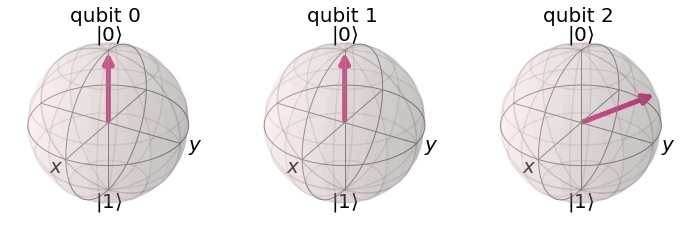

In [24]:
#let us run our quantum teleportation circuit 

backend = Aer.get_backend('statevector_simulator')

result = execute(qc, backend).result().get_statevector(qc, decimals = 3)

print('\n Quantum state is:', result)

plot_bloch_multivector(result)

In [ ]:
#the qubit 0 was our randome state and it has been teleported to the q2
#and it is no longer the random state which we initialized it Z